In [90]:
import xarray as xr
import numpy as np

In [91]:
tp_quantile = 0.0013141632
ws10_quantile = 11.48831558227539

In [92]:
speeds = xr.open_dataset("../data_grib/ANDEREW_1992_08.grib", engine='cfgrib', backend_kwargs={'filter_by_keys': {'paramId': [165, 166]}})
rainfall = xr.open_dataset("../data_grib/ANDEREW_1992_08.grib", engine='cfgrib', backend_kwargs={'filter_by_keys': {'paramId': [228]}})
extra = xr.open_dataset("../data_grib/ANDEREW_1992_08.grib", engine='cfgrib', backend_kwargs={'filter_by_keys': {'paramId': [134, 34]}})

speeds = speeds.to_dataframe()
rainfall = rainfall.to_dataframe()
extra = extra.to_dataframe()

u_speed = speeds.u10
v_speed = speeds.v10
ws10 = np.sqrt(u_speed**2 + v_speed**2)

speeds["ws10"] = ws10

Ignoring index file '../data_grib/ANDEREW_1992_08.grib.5b7b6.idx' incompatible with GRIB file
Ignoring index file '../data_grib/ANDEREW_1992_08.grib.5b7b6.idx' incompatible with GRIB file
Ignoring index file '../data_grib/ANDEREW_1992_08.grib.5b7b6.idx' incompatible with GRIB file


In [93]:
y1 = speeds.ws10.loc['1992-08-24 12:00:00']

test = rainfall.droplevel(level=[0,1])
vals = test.set_index([test.valid_time, test.index])
vals = vals.rename_axis(index={"valid_time":"time"})

y2 = vals.tp.loc['1992-08-24 12:00:00']

y3 = extra.sp.loc['1992-08-24 12:00:00']

In [94]:
mask_ws10 = y1 > ws10_quantile
mask_tp = y2 > tp_quantile

combined_mask = mask_ws10 | mask_tp

# Ensure combined_mask has a MultiIndex (lon, lat)
temp = combined_mask.unstack()
lat = temp.index.values
lon = temp.columns.values

# Loop over lat and lon and apply your conditions
for i in range(len(lat)):
    for j in range(len(lon)):

        # Set to False if outside the specified bounds
        if lat[i] <= 23 or lat[i] >= 29 or lon[j] <= -85 or lon[j] >= -75:

            combined_mask.loc[(lat[i], lon[j])] = False

        # Set to True if within the specified bounds (25 <= lon <= 27, 79 <= lat <= 83)
        if 25 <= lat[i] <= 27.5 and -82.5 <= lon[j] <= -79:

            combined_mask.loc[(lat[i], lon[j])] = True

In [95]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import pandas as pd

No Correlation ICAR Model

In [190]:
y1_filtered = y1.where(combined_mask)

temp = y1_filtered.unstack()
lat = temp.index.values
lon = temp.columns.values
data_grid = temp.values

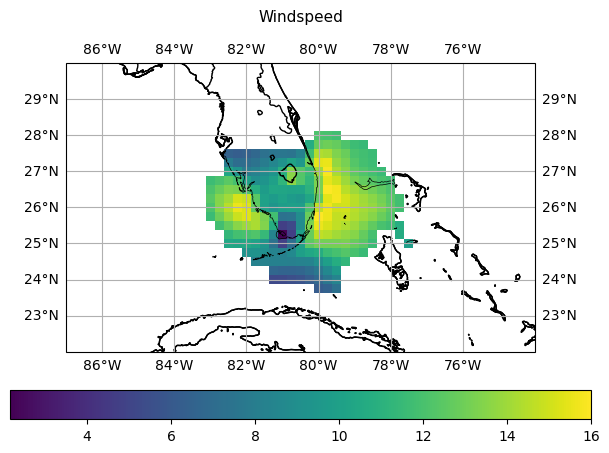

In [195]:
fig, ax = plt.subplots(figsize=(10, 5),
                       subplot_kw={'projection': ccrs.PlateCarree()})

ax.set_extent([-87, -74, 22, 30], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.RIVERS, edgecolor='black')

heatmap = ax.pcolormesh(lon, lat, data_grid, cmap='viridis', transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(heatmap, ax=ax, orientation='horizontal', shrink=0.75, pad=0.1)
#cbar.set_label('Windspeed')

# Add gridlines
ax.gridlines(draw_labels=True)

ax.set_title(f'Windspeed', fontsize=11, pad=15)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12);

# Show the plot
plt.show()

In [268]:
phi1_icar = pd.read_csv("post_icar_data/one_variable/mu1.csv")

data_grid_icar = data_grid.copy()

k = 0

for i in range(101):

    for j in range(40):

        if not np.isnan(data_grid_icar[j,i]):

            data_grid_icar[j,i] = phi1_icar.values[k]

            k+=1

C:\Users\44775\AppData\Local\Temp\ipykernel_20676\4208440232.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  data_grid_icar[j,i] = phi1_icar.values[k]


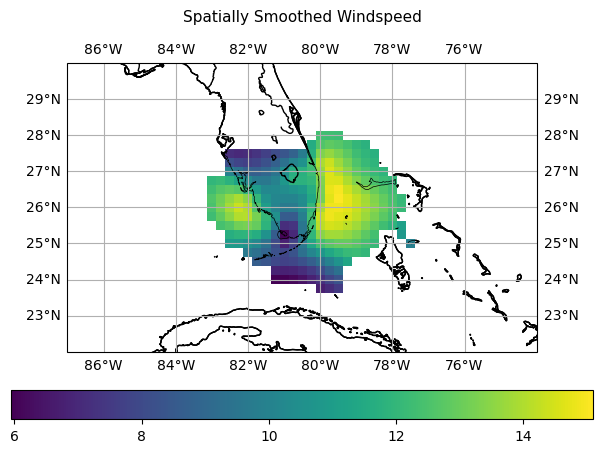

In [269]:
fig, ax = plt.subplots(figsize=(10, 5),
                       subplot_kw={'projection': ccrs.PlateCarree()})

ax.set_extent([-87, -74, 22, 30], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.RIVERS, edgecolor='black')

heatmap = ax.pcolormesh(lon, lat, data_grid_icar, cmap='viridis', transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(heatmap, ax=ax, orientation='horizontal', shrink=0.75, pad=0.1)
#cbar.set_label('Windspeed')

# Add gridlines
ax.gridlines(draw_labels=True)

ax.set_title(f'Spatially Smoothed Windspeed', fontsize=11, pad=15)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12);

# Show the plot
plt.show()

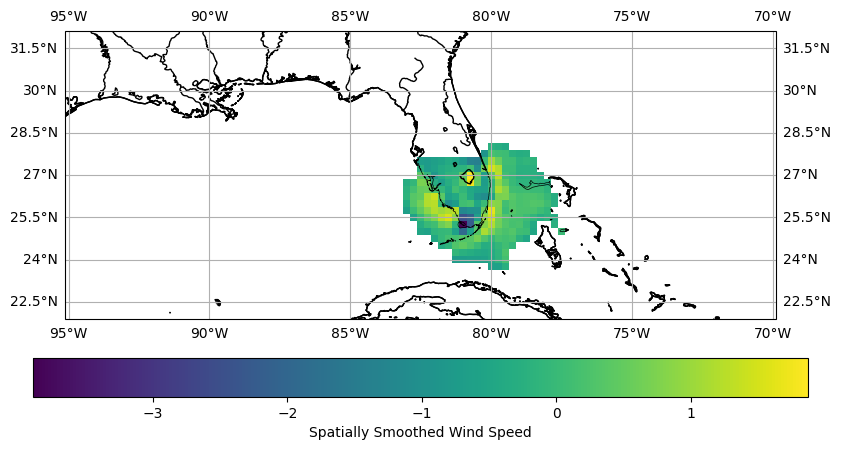

In [199]:
fig, ax = plt.subplots(figsize=(10, 5),
                       subplot_kw={'projection': ccrs.PlateCarree()})

#ax.set_extent([-70, -95, 32, 22])

ax.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.RIVERS, edgecolor='black')

heatmap = ax.pcolormesh(lon, lat, data_grid - data_grid_icar, cmap='viridis', transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(heatmap, ax=ax, orientation='horizontal', pad=0.1)
cbar.set_label('Spatially Smoothed Wind Speed')

# Add gridlines
ax.gridlines(draw_labels=True)

# Show the plot
plt.show()

ax.set_title(f'Correlation between ws10 and tp', fontsize=16)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12);

In [238]:
y2_filtered = y2.where(combined_mask)

temp = y2_filtered.unstack()
lat = temp.index.values
lon = temp.columns.values
data_grid = temp.values

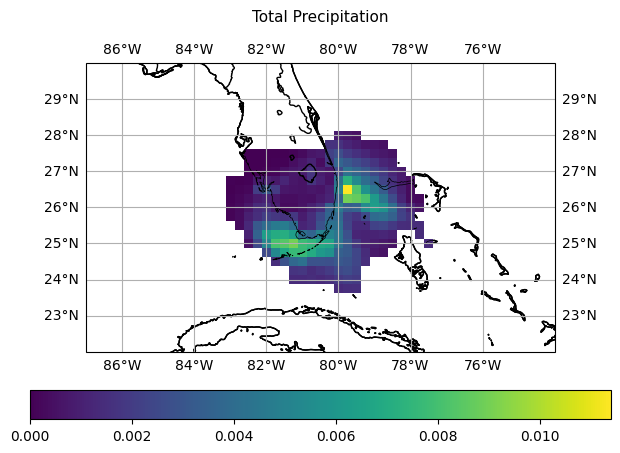

In [239]:
fig, ax = plt.subplots(figsize=(10, 5),
                       subplot_kw={'projection': ccrs.PlateCarree()})

ax.set_extent([-87, -74, 22, 30], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.RIVERS, edgecolor='black')

heatmap = ax.pcolormesh(lon, lat, data_grid, cmap='viridis', transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(heatmap, ax=ax, orientation='horizontal', shrink=0.75, pad=0.1)
#cbar.set_label('Windspeed')

# Add gridlines
ax.gridlines(draw_labels=True)

ax.set_title(f'Total Precipitation', fontsize=11, pad=15)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12);

# Show the plot
plt.show()

In [240]:
phi2_icar = pd.read_csv("post_icar_data/one_variable/mu2.csv")

data_grid_icar = data_grid.copy()

k = 0

for i in range(101):

    for j in range(40):

        if not np.isnan(data_grid_icar[j,i]):

            data_grid_icar[j,i] = phi2_icar.values[k]

            k+=1

C:\Users\44775\AppData\Local\Temp\ipykernel_20676\2884095811.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  data_grid_icar[j,i] = phi2_icar.values[k]


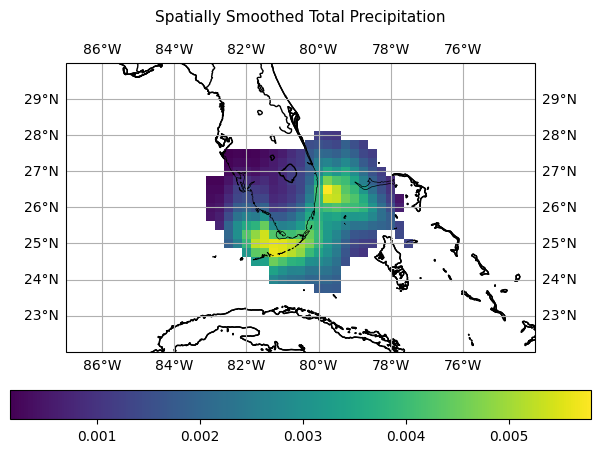

In [241]:
fig, ax = plt.subplots(figsize=(10, 5),
                       subplot_kw={'projection': ccrs.PlateCarree()})

ax.set_extent([-87, -74, 22, 30], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.RIVERS, edgecolor='black')

heatmap = ax.pcolormesh(lon, lat, data_grid_icar, cmap='viridis', transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(heatmap, ax=ax, orientation='horizontal', shrink=0.75, pad=0.1)
#cbar.set_label('Windspeed')

# Add gridlines
ax.gridlines(draw_labels=True)

ax.set_title(f'Spatially Smoothed Total Precipitation', fontsize=11, pad=15)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12);

# Show the plot
plt.show()

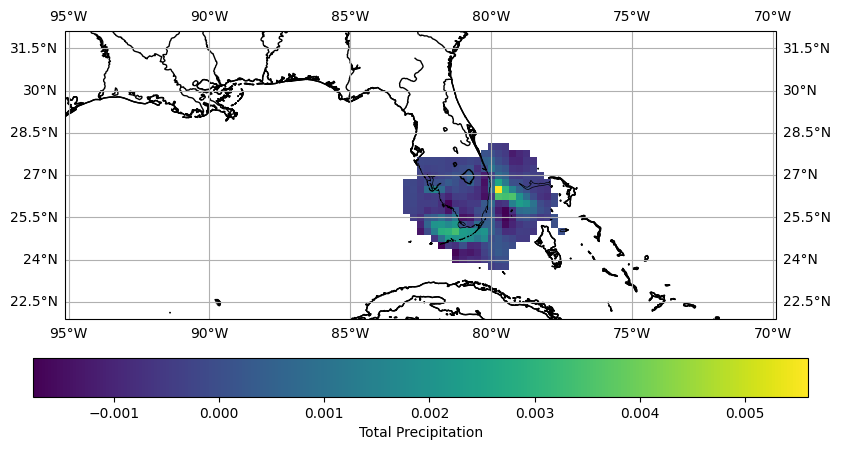

In [242]:
fig, ax = plt.subplots(figsize=(10, 5),
                       subplot_kw={'projection': ccrs.PlateCarree()})

#ax.set_extent([-70, -95, 32, 22])

ax.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.RIVERS, edgecolor='black')

heatmap = ax.pcolormesh(lon, lat, data_grid - data_grid_icar, cmap='viridis', transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(heatmap, ax=ax, orientation='horizontal', pad=0.1)
cbar.set_label('Total Precipitation')

# Add gridlines
ax.gridlines(draw_labels=True)

# Show the plot
plt.show()

ax.set_title(f'Correlation between ws10 and tp', fontsize=16)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12);

Empirical Correlation Plot

In [243]:
import pandas as pd

In [244]:
df_combined = pd.merge(speeds.ws10, vals.tp, on = ['time','latitude','longitude'], how='inner')

df_combined

ws10            tp
time                latitude longitude                        
1992-08-16 00:00:00 32.0     -95.00     2.962953  0.000000e+00
                             -94.75     3.031507  0.000000e+00
                             -94.50     2.941043  0.000000e+00
                             -94.25     2.921770  0.000000e+00
                             -94.00     2.961351  0.000000e+00
...                                          ...           ...
1992-08-28 23:00:00 22.0     -71.00     7.200126  0.000000e+00
                             -70.75     6.961875  0.000000e+00
                             -70.50     6.659889  0.000000e+00
                             -70.25     6.447994  0.000000e+00
                             -70.00     6.381748  4.768372e-07

[1291992 rows x 2 columns]

In [245]:
#Take a time window of 8 hours around our chosen time

window = ['1992-08-24 08:00:00', '1992-08-24 09:00:00','1992-08-24 10:00:00','1992-08-24 11:00:00','1992-08-24 12:00:00','1992-08-24 13:00:00','1992-08-24 14:00:00','1992-08-24 15:00:00', '1992-08-24 16:00:00']

df_window = df_combined.loc[window]

In [246]:
correlations = df_window.groupby(["latitude","longitude"]).apply(lambda x: x['ws10'].corr(x['tp']))

d:\M4R\M4R_venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\M4R\M4R_venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [247]:
miami_ws10 = df_combined.loc[(slice(None), 25.75, -80.25), 'ws10']

In [248]:
df_flat = df_combined.reset_index()

# First, turn Miami series into a DataFrame for merging
miami_ws10_df = miami_ws10.reset_index().rename(columns={'ws10': 'miami_ws10'})

# Merge with the flattened df
df_merged = df_flat.merge(miami_ws10_df[['time', 'miami_ws10']], on='time', how='left')

correlations_miami = df_merged.groupby(['latitude', 'longitude']).apply(
    lambda group: group['ws10'].corr(group['miami_ws10'])
)

C:\Users\44775\AppData\Local\Temp\ipykernel_20676\2145276989.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations_miami = df_merged.groupby(['latitude', 'longitude']).apply(


In [249]:
correlations_filtered = correlations_miami.where(combined_mask)

temp = correlations_filtered.unstack()
lat = temp.index.values
lon = temp.columns.values
data_grid = temp.values

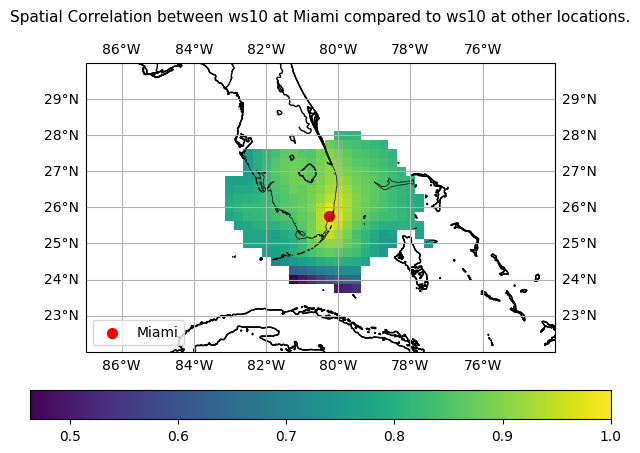

In [250]:
fig, ax = plt.subplots(figsize=(10, 5),
                       subplot_kw={'projection': ccrs.PlateCarree()})

ax.set_extent([-87, -74, 22, 30], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.RIVERS, edgecolor='black')

heatmap = ax.pcolormesh(lon, lat, data_grid, cmap='viridis', transform=ccrs.PlateCarree())

ax.scatter(-80.25, 25.75, color='red', s=50, transform=ccrs.PlateCarree(), label='Miami')
ax.legend(loc='lower left')

# Add a colorbar
cbar = plt.colorbar(heatmap, ax=ax, orientation='horizontal', shrink=0.75, pad=0.1)
#cbar.set_label('Spatial Correlation between ws10 at Miami compared to ws10 at other locations.')

# Add gridlines
ax.gridlines(draw_labels=True)



ax.set_title(f'Spatial Correlation between ws10 at Miami compared to ws10 at other locations.', fontsize=11, pad = 15)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12);

# Show the plot
plt.show()

In [251]:
correlations_filtered = correlations.where(combined_mask)

temp = correlations_filtered.unstack()
lat = temp.index.values
lon = temp.columns.values
data_grid = temp.values

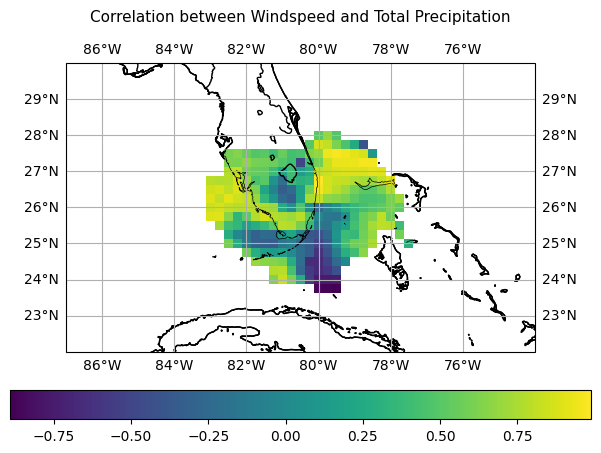

In [252]:
fig, ax = plt.subplots(figsize=(10, 5),
                       subplot_kw={'projection': ccrs.PlateCarree()})

ax.set_extent([-87, -74, 22, 30], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.RIVERS, edgecolor='black')

heatmap = ax.pcolormesh(lon, lat, data_grid, cmap='viridis', transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(heatmap, ax=ax, orientation='horizontal', shrink=0.75, pad=0.1)
#cbar.set_label('Windspeed')

# Add gridlines
ax.gridlines(draw_labels=True)

ax.set_title(f'Correlation between Windspeed and Total Precipitation', fontsize=11, pad=15)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12);

# Show the plot
plt.show()

In [ ]:
corr = []

k = 0

for i in range(101):

    for j in range(40):

        if not np.isnan(data_grid[j,i]):

            corr.append(data_grid[j,i])

In [254]:
np.savetxt("pre_icar_data/corr.csv", corr, delimiter=",", fmt="%.6f")

Correlations from 2 variable ICAR model

In [255]:
correlations_icar = pd.read_csv("post_icar_data/two_variable/correlations.csv")

In [256]:
y1_filtered = y1.where(combined_mask)

temp = y1_filtered.unstack()
lat = temp.index.values
lon = temp.columns.values
data_grid = temp.values

In [257]:
data_grid_icar = data_grid.copy()

In [258]:
k = 0

for i in range(101):

    for j in range(40):

        if not np.isnan(data_grid_icar[j,i]):

            data_grid_icar[j,i] = correlations_icar.values[k]

            k += 1

C:\Users\44775\AppData\Local\Temp\ipykernel_20676\1180281019.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  data_grid_icar[j,i] = correlations_icar.values[k]


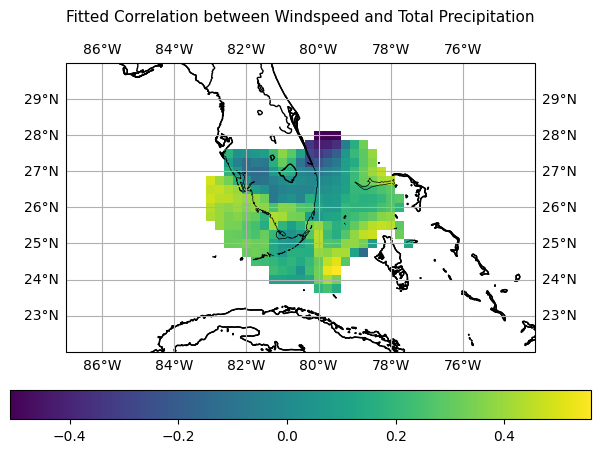

In [260]:
fig, ax = plt.subplots(figsize=(10, 5),
                       subplot_kw={'projection': ccrs.PlateCarree()})

ax.set_extent([-87, -74, 22, 30], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.RIVERS, edgecolor='black')

heatmap = ax.pcolormesh(lon, lat, data_grid_icar, cmap='viridis', transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(heatmap, ax=ax, orientation='horizontal', shrink=0.75, pad=0.1)
#cbar.set_label('Windspeed')

# Add gridlines
ax.gridlines(draw_labels=True)

ax.set_title(f'Fitted Correlation between Windspeed and Total Precipitation', fontsize=11, pad=15)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12);

# Show the plot
plt.show()

In [263]:
phi1_icar = pd.read_csv("post_icar_data/two_variable/mu1.csv")

data_grid_icar = data_grid.copy()

k = 0

for i in range(101):

    for j in range(40):

        if not np.isnan(data_grid_icar[j,i]):

            data_grid_icar[j,i] = phi1_icar.values[k]

            k += 1

C:\Users\44775\AppData\Local\Temp\ipykernel_20676\3812264309.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  data_grid_icar[j,i] = phi1_icar.values[k]


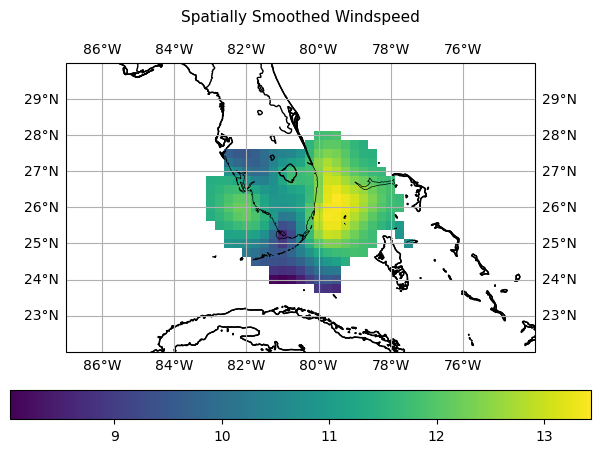

In [264]:
fig, ax = plt.subplots(figsize=(10, 5),
                       subplot_kw={'projection': ccrs.PlateCarree()})

ax.set_extent([-87, -74, 22, 30], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.RIVERS, edgecolor='black')

heatmap = ax.pcolormesh(lon, lat, data_grid_icar, cmap='viridis', transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(heatmap, ax=ax, orientation='horizontal', shrink=0.75, pad=0.1)
#cbar.set_label('Windspeed')

# Add gridlines
ax.gridlines(draw_labels=True)

ax.set_title(f'Spatially Smoothed Windspeed', fontsize=11, pad=15)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12);

# Show the plot
plt.show()

In [266]:
phi2_icar = pd.read_csv("post_icar_data/two_variable/mu2.csv")

data_grid_icar = data_grid.copy()

k = 0

for i in range(101):

    for j in range(40,1,-1):

        if not np.isnan(data_grid_icar[j,i]):

            data_grid_icar[j,i] = phi2_icar.values[k]

            k += 1

C:\Users\44775\AppData\Local\Temp\ipykernel_20676\2616543751.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  data_grid_icar[j,i] = phi2_icar.values[k]


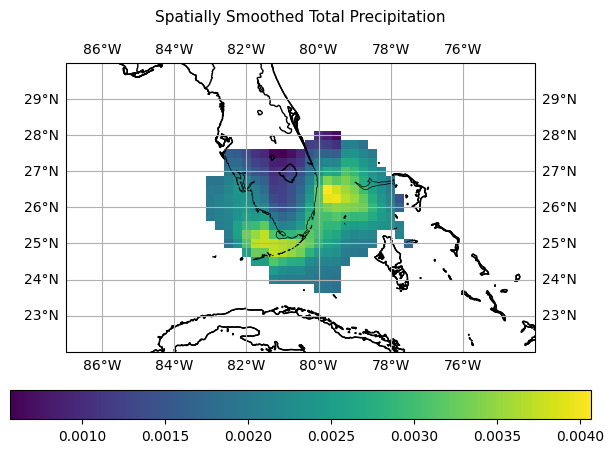

In [267]:
fig, ax = plt.subplots(figsize=(10, 5),
                       subplot_kw={'projection': ccrs.PlateCarree()})

ax.set_extent([-87, -74, 22, 30], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.RIVERS, edgecolor='black')

heatmap = ax.pcolormesh(lon, lat, data_grid_icar, cmap='viridis', transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(heatmap, ax=ax, orientation='horizontal', shrink=0.75, pad=0.1)
#cbar.set_label('Windspeed')

# Add gridlines
ax.gridlines(draw_labels=True)

ax.set_title(f'Spatially Smoothed Total Precipitation', fontsize=11, pad=15)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12);

# Show the plot
plt.show()

Three Variable:

In [270]:
df_temp = pd.merge(df_combined, extra.sp, on=['time','latitude','longitude'], how='left')

In [271]:
window = ['1992-08-24 08:00:00', '1992-08-24 09:00:00','1992-08-24 10:00:00','1992-08-24 11:00:00','1992-08-24 12:00:00','1992-08-24 13:00:00','1992-08-24 14:00:00','1992-08-24 15:00:00', '1992-08-24 16:00:00']

df_window = df_temp.loc[window]

In [272]:
correlations = df_window.groupby(["latitude","longitude"]).apply(lambda x: x['ws10'].corr(x['sp']))

correlations_filtered = correlations.where(combined_mask)

temp = correlations_filtered.unstack()
lat = temp.index.values
lon = temp.columns.values
data_grid = temp.values

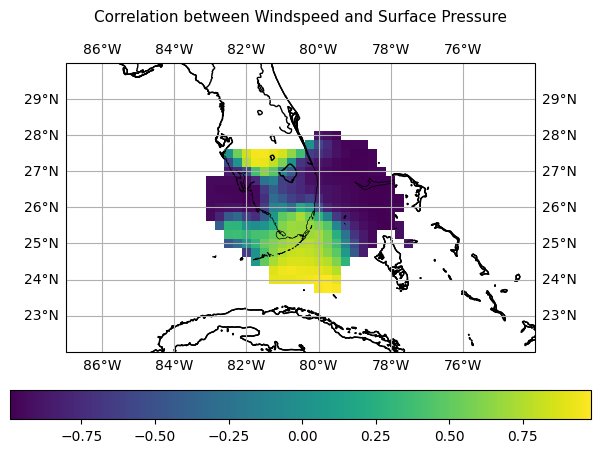

In [273]:
fig, ax = plt.subplots(figsize=(10, 5),
                       subplot_kw={'projection': ccrs.PlateCarree()})

ax.set_extent([-87, -74, 22, 30], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.RIVERS, edgecolor='black')

heatmap = ax.pcolormesh(lon, lat, data_grid, cmap='viridis', transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(heatmap, ax=ax, orientation='horizontal', shrink=0.75, pad=0.1)
#cbar.set_label('Windspeed')

# Add gridlines
ax.gridlines(draw_labels=True)

ax.set_title(f'Correlation between Windspeed and Surface Pressure', fontsize=11, pad=15)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12);

# Show the plot
plt.show()

In [274]:
corr = []

k = 0

for i in range(101):

    for j in range(40):

        if not np.isnan(data_grid[j,i]):

            corr.append(data_grid[j,i])

np.savetxt("pre_icar_data/gam_corr.csv", corr, delimiter=",", fmt="%.6f")

In [275]:
correlations = df_window.groupby(["latitude","longitude"]).apply(lambda x: x['tp'].corr(x['sp']))

correlations_filtered = correlations.where(combined_mask)

temp = correlations_filtered.unstack()
lat = temp.index.values
lon = temp.columns.values
data_grid = temp.values

d:\M4R\M4R_venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\M4R\M4R_venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


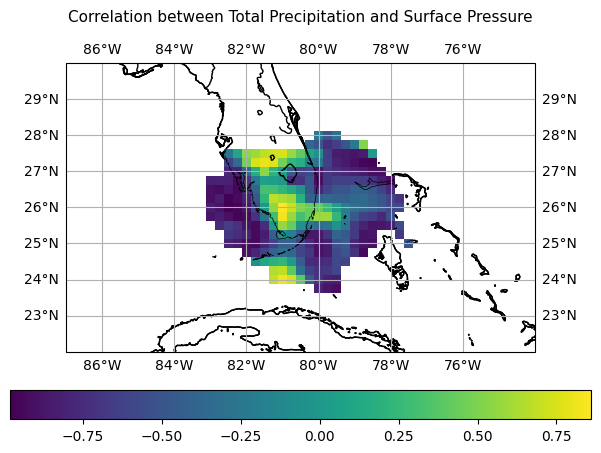

In [276]:
fig, ax = plt.subplots(figsize=(10, 5),
                       subplot_kw={'projection': ccrs.PlateCarree()})

ax.set_extent([-87, -74, 22, 30], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.RIVERS, edgecolor='black')

heatmap = ax.pcolormesh(lon, lat, data_grid, cmap='viridis', transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(heatmap, ax=ax, orientation='horizontal', shrink=0.75, pad=0.1)
#cbar.set_label('Windspeed')

# Add gridlines
ax.gridlines(draw_labels=True)

ax.set_title(f'Correlation between Total Precipitation and Surface Pressure', fontsize=11, pad=15)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12);

# Show the plot
plt.show()

In [277]:
corr = []

k = 0

for i in range(101):

    for j in range(40):

        if not np.isnan(data_grid[j,i]):

            corr.append(data_grid[j,i])

np.savetxt("pre_icar_data/del_corr.csv", corr, delimiter=",", fmt="%.6f")

Now with the model.

In [278]:
correlations_rho = pd.read_csv("post_icar_data/three_variable/correlations_rho.csv")
correlations_gam = pd.read_csv("post_icar_data/three_variable/correlations_gam.csv")
correlations_del = pd.read_csv("post_icar_data/three_variable/correlations_del.csv")

In [127]:
data_grid_rho = data_grid.copy()

k = 0

for i in range(101):

    for j in range(40,-1,-1):

        if not np.isnan(data_grid_rho[j,i]):

            data_grid_rho[j,i] = full_correlations_rho[k]

            k+=1

C:\Users\44775\AppData\Local\Temp\ipykernel_16188\502173928.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  data_grid_rho[j,i] = full_correlations_rho[k]


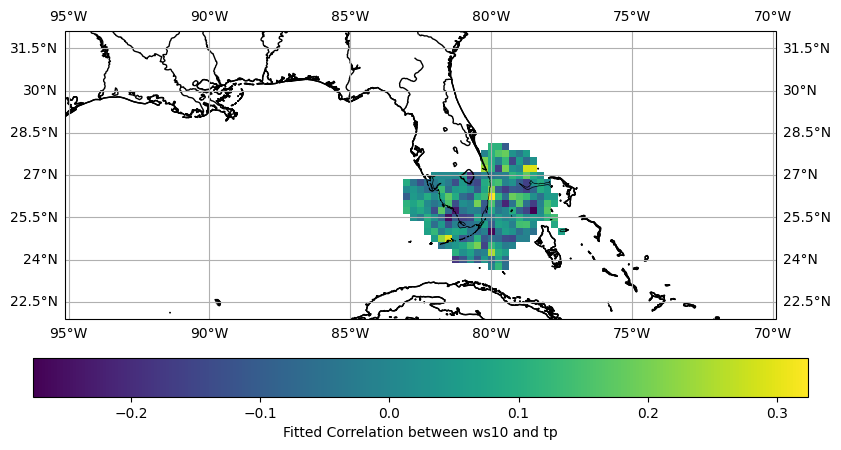

In [129]:
fig, ax = plt.subplots(figsize=(10, 5),
                       subplot_kw={'projection': ccrs.PlateCarree()})

#ax.set_extent([-70, -95, 32, 22])

ax.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.RIVERS, edgecolor='black')

heatmap = ax.pcolormesh(lon, lat, data_grid_rho, cmap='viridis', transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(heatmap, ax=ax, orientation='horizontal', pad=0.1)
cbar.set_label('Fitted Correlation between ws10 and tp')

# Add gridlines
ax.gridlines(draw_labels=True)

# Show the plot
plt.show()

ax.set_title(f'Correlation between ws10 and tp', fontsize=16)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12);

In [130]:
full_correlations_gam = node_correlations_gam.copy()

for i in range(len(node1)):
    
    edge = node1.values[i]

    full_correlations_gam[edge-1] += edge_correlations_gam.values[i]

for i in range(len(node2)):
    
    edge = node2.values[i]

    full_correlations_gam[edge-1] += edge_correlations_gam.values[i]

In [131]:
data_grid_gam = data_grid.copy()

k = 0

for i in range(101):

    for j in range(40,-1,-1):

        if not np.isnan(data_grid_gam[j,i]):

            data_grid_gam[j,i] = full_correlations_gam[k]

            k+=1

C:\Users\44775\AppData\Local\Temp\ipykernel_16188\3817097490.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  data_grid_gam[j,i] = full_correlations_gam[k]


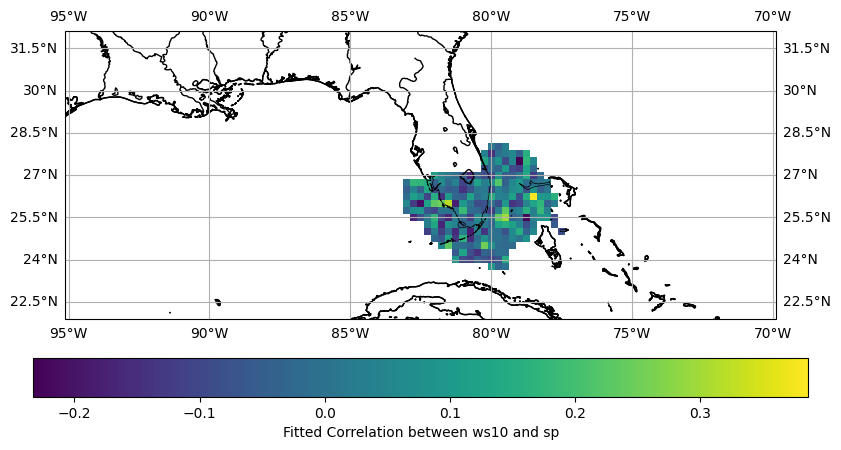

In [133]:
fig, ax = plt.subplots(figsize=(10, 5),
                       subplot_kw={'projection': ccrs.PlateCarree()})

#ax.set_extent([-70, -95, 32, 22])

ax.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.RIVERS, edgecolor='black')

heatmap = ax.pcolormesh(lon, lat, data_grid_gam, cmap='viridis', transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(heatmap, ax=ax, orientation='horizontal', pad=0.1)
cbar.set_label('Fitted Correlation between ws10 and sp')

# Add gridlines
ax.gridlines(draw_labels=True)

# Show the plot
plt.show()

ax.set_title(f'Correlation between ws10 and tp', fontsize=16)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12);

In [134]:
full_correlations_del = node_correlations_del.copy()

for i in range(len(node1)):
    
    edge = node1.values[i]

    full_correlations_del[edge-1] += edge_correlations_del.values[i]

for i in range(len(node2)):
    
    edge = node2.values[i]

    full_correlations_del[edge-1] += edge_correlations_del.values[i]

In [135]:
data_grid_del = data_grid.copy()

k = 0

for i in range(101):

    for j in range(40,-1,-1):

        if not np.isnan(data_grid_del[j,i]):

            data_grid_del[j,i] = full_correlations_del[k]

            k+=1

C:\Users\44775\AppData\Local\Temp\ipykernel_16188\3602602357.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  data_grid_del[j,i] = full_correlations_del[k]


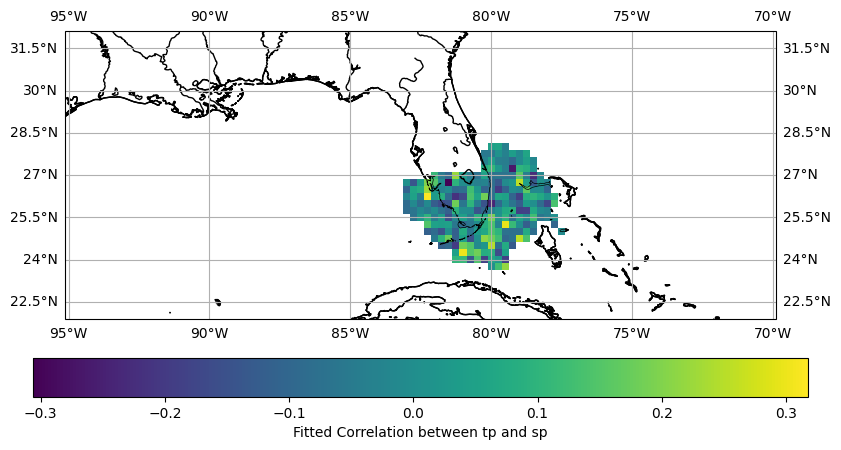

In [136]:
fig, ax = plt.subplots(figsize=(10, 5),
                       subplot_kw={'projection': ccrs.PlateCarree()})

#ax.set_extent([-70, -95, 32, 22])

ax.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.RIVERS, edgecolor='black')

heatmap = ax.pcolormesh(lon, lat, data_grid_del, cmap='viridis', transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(heatmap, ax=ax, orientation='horizontal', pad=0.1)
cbar.set_label('Fitted Correlation between tp and sp')

# Add gridlines
ax.gridlines(draw_labels=True)

# Show the plot
plt.show()

ax.set_title(f'Correlation between ws10 and tp', fontsize=16)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12);

In [137]:
print(full_correlations_rho.mean())
print(full_correlations_rho.max())
print(full_correlations_rho.min())

0.01423197121177379
0.3242738485748333
-0.2758498454399999


In [138]:
print(full_correlations_gam.mean())
print(full_correlations_gam.max())
print(full_correlations_gam.min())

0.012622104296483977
0.38665894148066665
-0.2329386233691666


In [139]:
print(full_correlations_del.mean())
print(full_correlations_del.max())
print(full_correlations_del.min())

-9.199673180558471e-05
0.3178556822132501
-0.3059091878751667


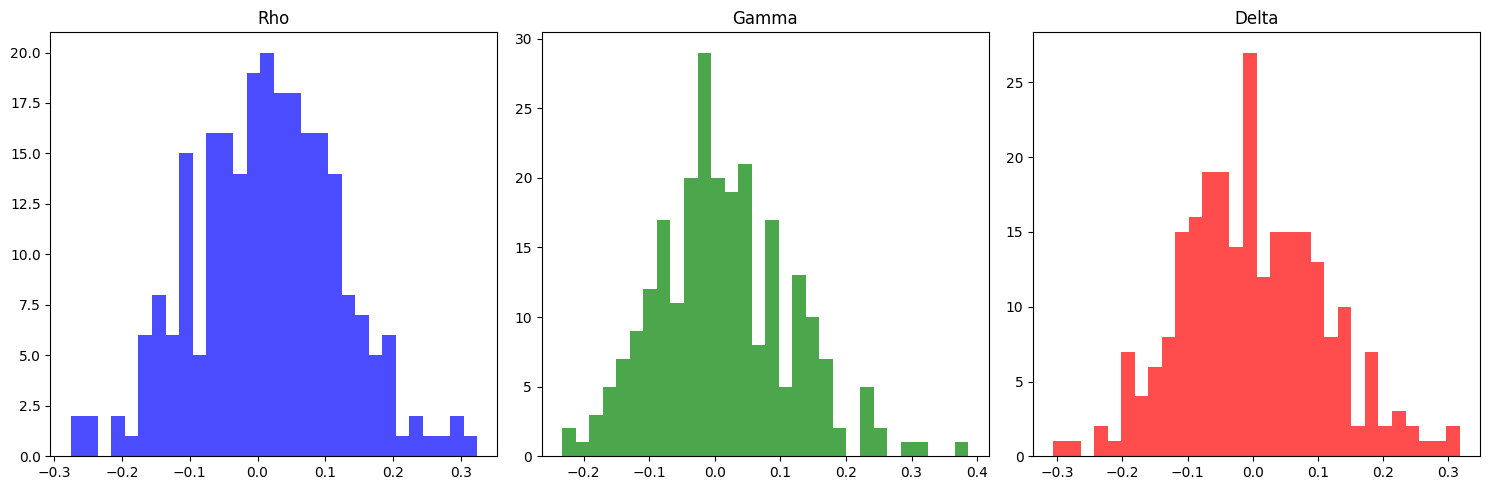

In [140]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Plot histograms
axes[0].hist(full_correlations_rho, bins=30, color='blue', alpha=0.7)
axes[0].set_title("Rho")

axes[1].hist(full_correlations_gam, bins=30, color='green', alpha=0.7)
axes[1].set_title("Gamma")

axes[2].hist(full_correlations_del, bins=30, color='red', alpha=0.7)
axes[2].set_title("Delta")

# Show the plot
plt.tight_layout()
plt.show()

In [147]:
print(sum(full_correlations_rho>0)/N)
print(sum(full_correlations_gam>0)/N)
print(sum(full_correlations_del>0)/N)

[0.55241935]
[0.50806452]
[0.45967742]


In [148]:
correlations1 = df_window.groupby(["latitude","longitude"]).apply(lambda x: x['ws10'].corr(x['tp']))
correlations2 = df_window.groupby(["latitude","longitude"]).apply(lambda x: x['ws10'].corr(x['sp']))
correlations3 = df_window.groupby(["latitude","longitude"]).apply(lambda x: x['tp'].corr(x['sp']))

d:\M4R\M4R_venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\M4R\M4R_venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [149]:
emp_corr_rho = correlations1[combined_mask].values
emp_corr_gam = correlations2[combined_mask].values
emp_corr_del = correlations3[combined_mask].values

In [150]:
print(sum(emp_corr_rho>0)/N)
print(sum(emp_corr_gam>0)/N)
print(sum(emp_corr_del>0)/N)

0.6935483870967742
0.3467741935483871
0.23387096774193547


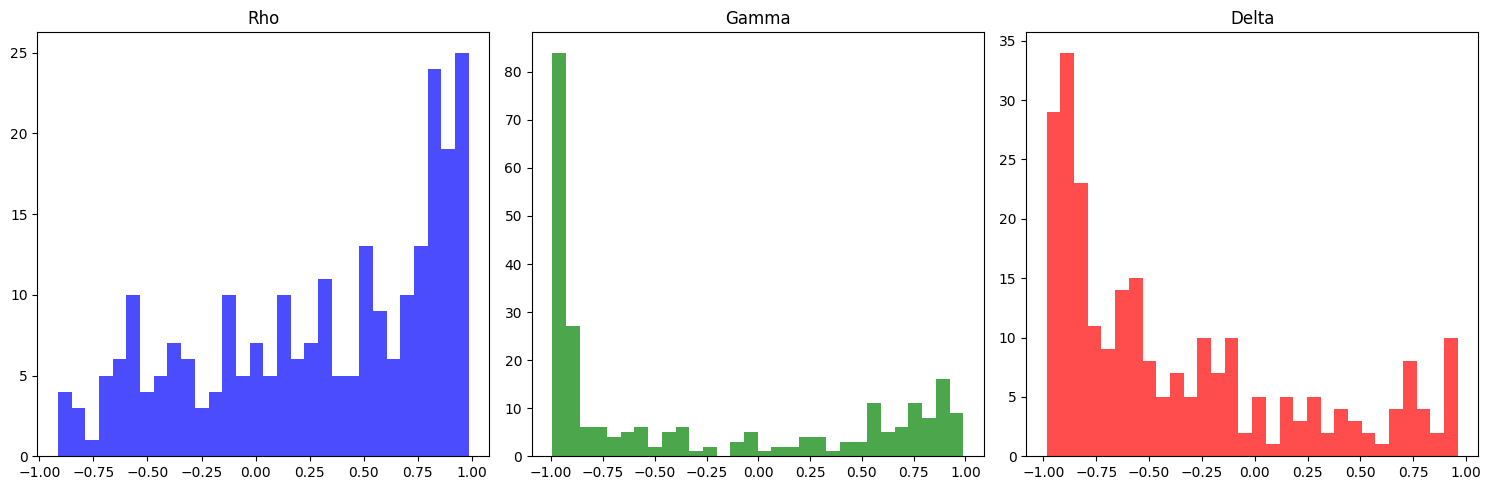

In [151]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Plot histograms
axes[0].hist(emp_corr_rho, bins=30, color='blue', alpha=0.7)
axes[0].set_title("Rho")

axes[1].hist(emp_corr_gam, bins=30, color='green', alpha=0.7)
axes[1].set_title("Gamma")

axes[2].hist(emp_corr_del, bins=30, color='red', alpha=0.7)
axes[2].set_title("Delta")

# Show the plot
plt.tight_layout()
plt.show()